In [33]:
#Haris Amaldi
#Dilarang mengcopy code. PLAGIARISME ITU HARAM!
#Mengimpor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [34]:
#Membuka data yang dibutuhkan
asuransi = pd.read_csv('insurance.csv')
asuransi

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [35]:
#Mencari informasi dari data
asuransi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
#Deskripsi data
asuransi.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

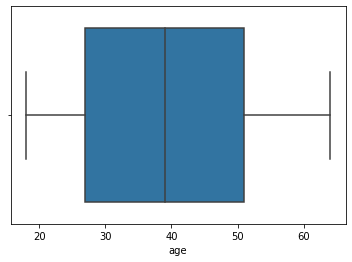

In [39]:
#Mencari data yang sengklek
sns.boxplot(x=asuransi['age'])

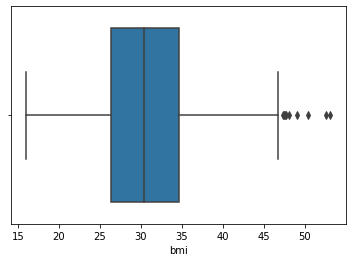

In [40]:
sns.boxplot(x=asuransi['bmi'])

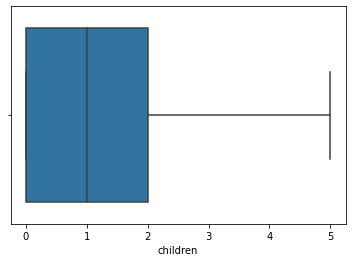

In [41]:
sns.boxplot(x=asuransi['children'])

In [42]:
#Membuang data yang sengklek
Q1 = asuransi.quantile(0.25)
Q3 = asuransi.quantile(0.75)
IQR=Q3-Q1
asuransi=asuransi[~((asuransi<(Q1-1.5*IQR))|(asuransi>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita hilangkan beberapa data yang diluar trend
asuransi.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


(1193, 7)

In [43]:
numerical_features = ['age', 'bmi', 'children', 'charge']
categorical_features = ['sex', 'smoker', 'region']

        jumlah sampel  persentase
female            611        51.2
male              582        48.8


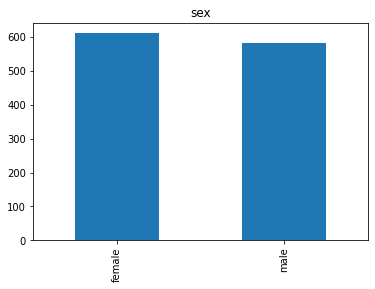

In [44]:
#Melihat kondisi data sample
feature = categorical_features[0]
count = asuransi[feature].value_counts()
percent = 100*asuransi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
no            1055        88.4
yes            138        11.6


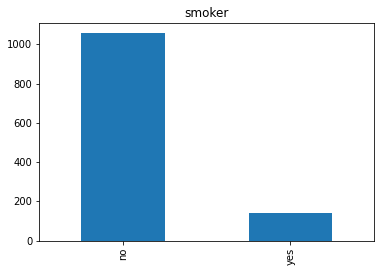

In [45]:
feature = categorical_features[1]
count = asuransi[feature].value_counts()
percent = 100*asuransi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

           jumlah sampel  persentase
northwest            305        25.6
southeast            302        25.3
northeast            295        24.7
southwest            291        24.4


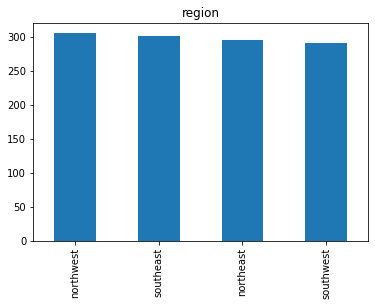

In [46]:
feature = categorical_features[2]
count = asuransi[feature].value_counts()
percent = 100*asuransi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);


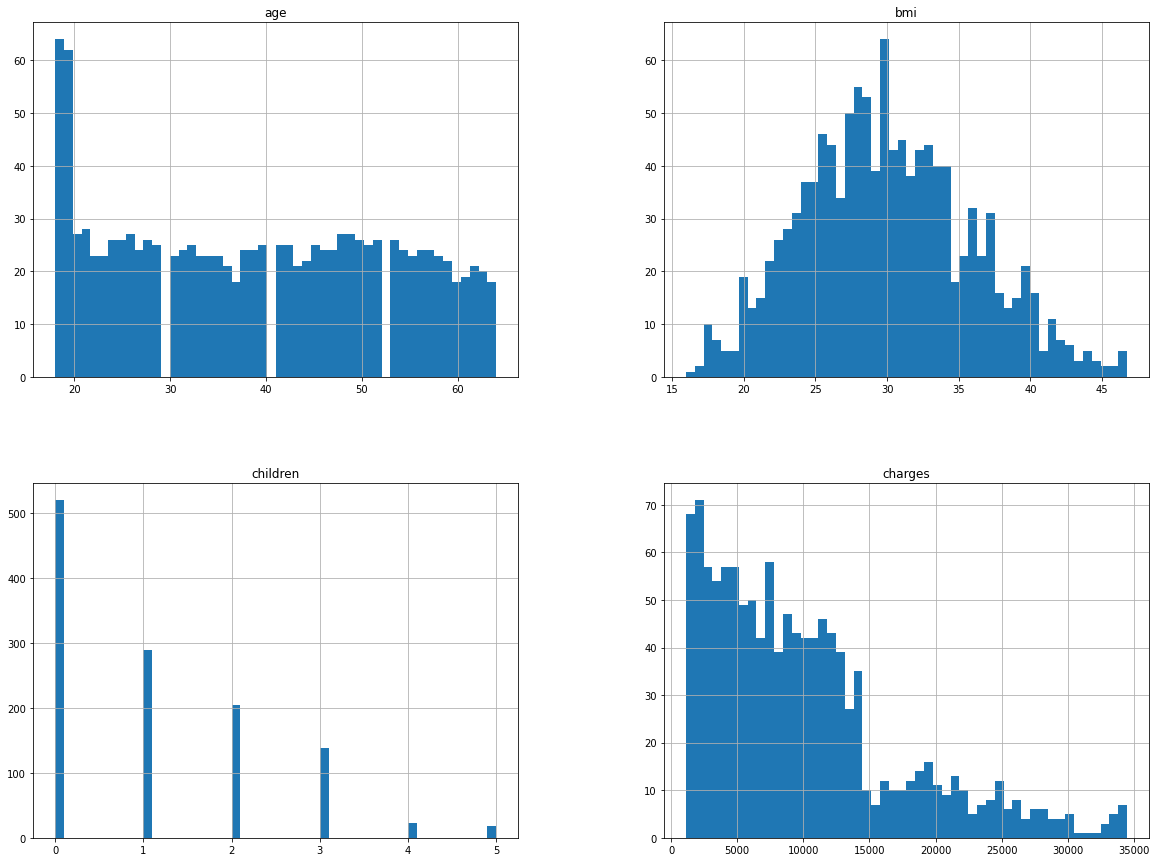

In [47]:
#Melihat persebaran data
asuransi.hist(bins=50, figsize=(20,15))
plt.show()

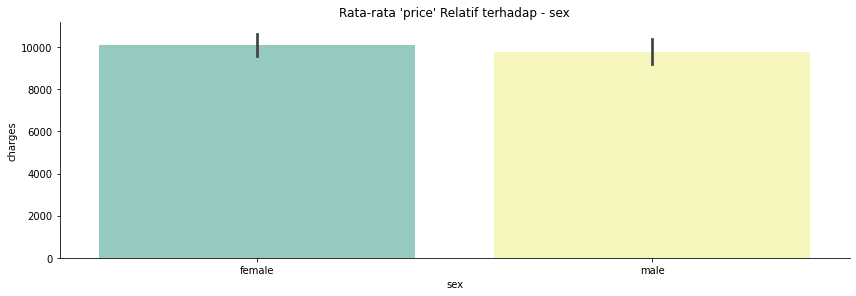

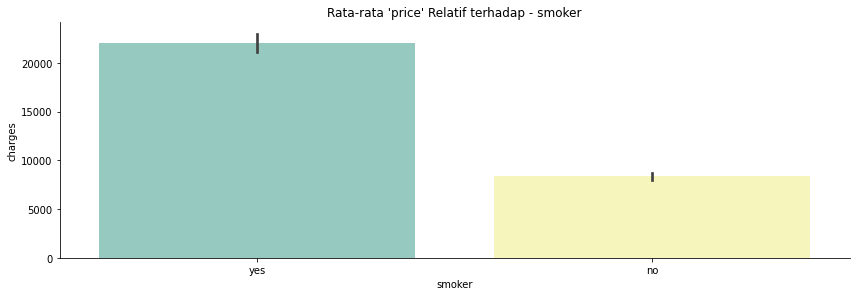

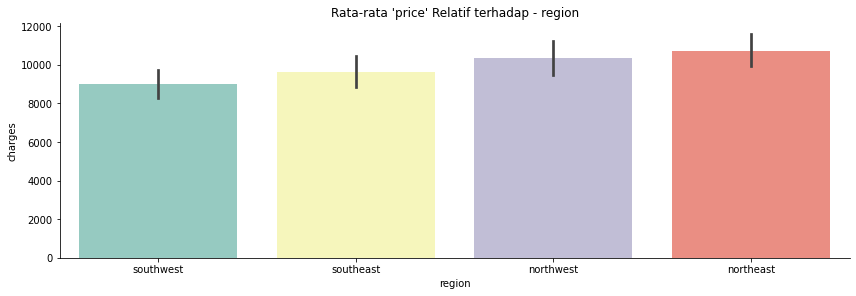

In [48]:
#Membuat kurva hubungan antara berbagai variabel terhadap harga dan melihat hubungannya dengan biaya asuransi
cat_features = asuransi.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=asuransi, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

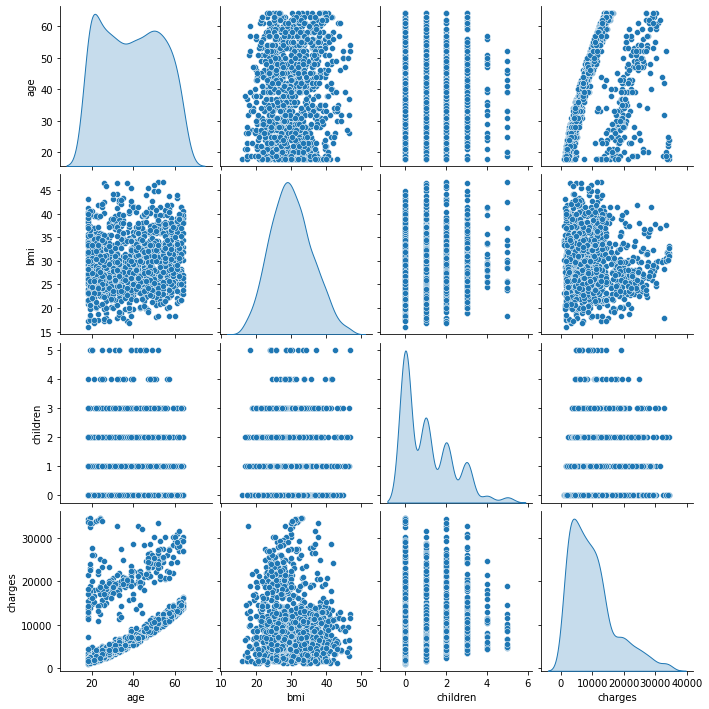

In [49]:
sns.pairplot(asuransi, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

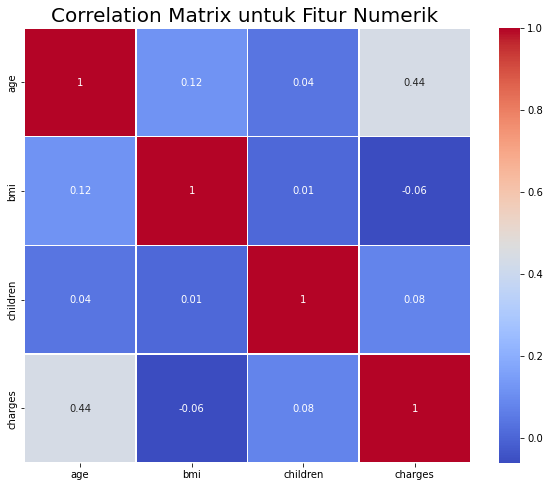

In [50]:
#Mencari korelasi antar variabel angka
plt.figure(figsize=(10, 8))
correlation_matrix = asuransi.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [51]:
#Menghapus data jumlah anak karena tidak berkorelasi pada data apapun
asuransi.drop(['children'], inplace=True, axis=1)
asuransi.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


age     sex     bmi smoker     region      charges
0   19  female  27.900    yes  southwest  16884.92400
1   18    male  33.770     no  southeast   1725.55230
2   28    male  33.000     no  southeast   4449.46200
3   33    male  22.705     no  northwest  21984.47061
4   32    male  28.880     no  northwest   3866.85520

In [52]:
#Menerjemah yes no agar bisa dibaca oleh kode ML
from sklearn.preprocessing import  OneHotEncoder
asuransi = pd.concat([asuransi, pd.get_dummies(asuransi['sex'], prefix='sex')],axis=1)
asuransi = pd.concat([asuransi, pd.get_dummies(asuransi['smoker'], prefix='smoker')],axis=1)
asuransi = pd.concat([asuransi, pd.get_dummies(asuransi['region'], prefix='region')],axis=1)
asuransi.drop(['sex','smoker','region'], axis=1, inplace=True)
asuransi.head()

age     bmi      charges  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900  16884.92400           1         0          0           1   
1   18  33.770   1725.55230           0         1          1           0   
2   28  33.000   4449.46200           0         1          1           0   
3   33  22.705  21984.47061           0         1          1           0   
4   32  28.880   3866.85520           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0

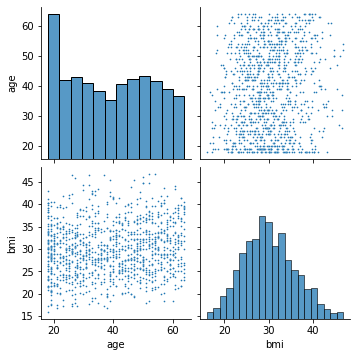

In [53]:
sns.pairplot(asuransi[['age','bmi']], plot_kws={"s": 3});

In [54]:
#Karena cukup berkorelasi, gabungkan umur dan bmi jadi faktor baru bernama "Faktor Kesehatan"
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2, random_state=123)
pca.fit(asuransi[['age','bmi']])
princ_comp = pca.transform(asuransi[['age','bmi']])

In [55]:
pca.explained_variance_ratio_.round(2)

array([0.85, 0.15])

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(asuransi[['age','bmi']])
asuransi['faktor kesehatan'] = pca.transform(asuransi.loc[:, ('age','bmi')]).flatten()
asuransi.drop(['age','bmi'], axis=1, inplace=True)

In [57]:
#Memisahkan data latih dan data uji
from sklearn.model_selection import train_test_split
 
X = asuransi.drop(["charges"],axis =1)
y = asuransi["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [58]:
#Melihat jumlah data, data latih, dan data uji
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1193
Total # of sample in train dataset: 954
Total # of sample in test dataset: 239


In [59]:
#Standarisasi faktor kesehatan
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['faktor kesehatan']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

faktor kesehatan
824           1.453162
194          -1.451709
1060         -1.040953
820           0.440692
996           0.021188

In [60]:
X_train[numerical_features].describe().round(4)

faktor kesehatan
count          954.0000
mean             0.0000
std              1.0005
min             -1.5317
25%             -0.9119
50%             -0.0006
75%              0.8652
max              1.8040

In [61]:
# Impor library yang dibutuhkan
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])
# buat model prediksi KNN
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)
    

In [62]:
# buat model prediksi Random forest
RF = RandomForestRegressor(n_estimators=100, max_depth=25, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)  

In [63]:
#Buat model boosting
boosting = AdaBoostRegressor(learning_rate=0.001, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [64]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

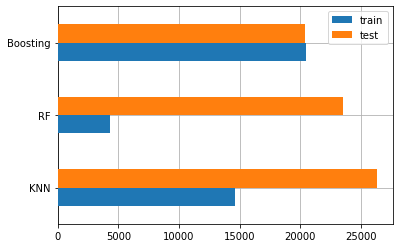

In [65]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [66]:
#Melihat hasil prediksi
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting
274  2523.1695        3364.4       4170.0             4384.3

In [ ]:
#Ketelitian pada hasil prediksi KNN lebih baik daripada RF dan Boosting. Pada kasus ini, saya pakai KNN.